<a href="https://colab.research.google.com/github/ABBU2712/Open-Source-Kornia/blob/main/Tutorial_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip install kornia

In [2]:
import torch
import kornia as K

import cv2
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/kornia/augmentation/augmentation.py:1833: DeprecationWarning: GaussianBlur is no longer maintained and will be removed from the future versions. Please use RandomGaussianBlur instead.
  category=DeprecationWarning,


In [3]:
img_bgr: np.ndarray = cv2.imread('Pant.png')  # HxWxC / np.uint8

img: torch.tensor = K.image_to_tensor(img_bgr, keepdim=False)  # 1xCxHxW / torch.uint8
img = K.bgr_to_rgb(img)
print(img.shape)

torch.Size([1, 3, 1080, 1920])


In [4]:
# the source points are the region to crop corners
points_src = torch.tensor([[
    [125., 150.], [562., 40.], [562., 282.], [54., 328.],
]])

# the destination points are the image vertexes
h, w = 64, 128  # destination size
points_dst = torch.tensor([[
    [0., 0.], [w - 1., 0.], [w - 1., h - 1.], [0., h - 1.],
]])

# compute perspective transform
M: torch.tensor = K.get_perspective_transform(points_src, points_dst)

# warp the original image by the found transform
img_warp: torch.tensor = K.warp_perspective(img.float(), M, dsize=(h, w))
print(img_warp.shape)
torch.Size([1, 3, 64, 128])

torch.Size([1, 3, 64, 128])


/usr/local/lib/python3.7/dist-packages/kornia/utils/helpers.py:96: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  /pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:760.)
  out1, out2 = torch.solve(input.to(dtype), A.to(dtype))
/usr/local/lib/python3.7/dist-packages/kornia/geometry/transform/imgwarp.py:99: UserWarning: The align_corners default value has been changed. By default now is set True in order to match cv2.warpPerspective. In case you want to keep your previous behaviour set it to False. This warning will disappear in kornia > v0.6.
  warnings.warn(message)


torch.Size([1, 3, 64, 128])

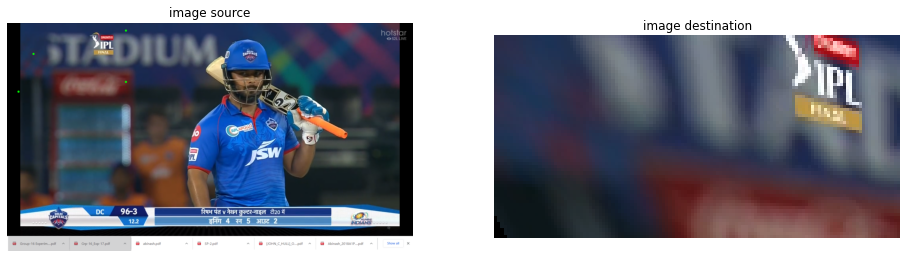

In [5]:
# convert back to numpy
img_np = K.tensor_to_image(img.byte())
img_warp_np: np.ndarray = K.tensor_to_image(img_warp.byte())

# draw points into original image
for i in range(4):
    center = tuple(points_src[0, i].long().numpy())
    img_np = cv2.circle(img_np.copy(), center, 5, (0, 255, 0), -1)

# create the plot
fig, axs = plt.subplots(1, 2, figsize=(16, 10))
axs = axs.ravel()

axs[0].axis('off')
axs[0].set_title('image source')
axs[0].imshow(img_np)

axs[1].axis('off')
axs[1].set_title('image destination')
axs[1].imshow(img_warp_np)